# MNIST Data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('./mnist_train.csv')

print(d0.shape)
print(d0.head(5)) #print first 5 row of d0

#save the labels into variable into l
l = d0['label']

#drop the label feature and store the pixel data in d
d = d0.drop("label", axis=1)

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0      

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


/home/himanshu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


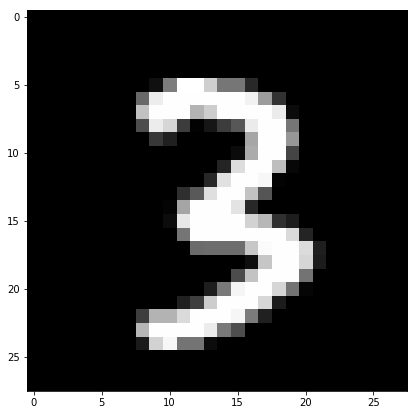

3


In [3]:
#Display or plot a number

plt.figure(figsize=(7,7))

idx = 801

grid_data = d.iloc[idx].as_matrix().reshape(28,28) #reshape from 1D to 2D pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

# 2-D Visualization using PCA

Steps to perform PCA manually:
    1. Load the data-sets
    2. Perform pre-processing - Standardizing the data.(Mean=0, Variance=1)
    3. Find Co-Variance Matrix which is S = A^T * A.
    4. Find Eigen Values and corresponding Eigen Vector from the above co-var matrix (in this example we are taking top two eigen values)(2 is the number of dim of the new feature sub-space which is <=d.)
    5. Taking top 2 eigen vector and multiplying with sample data so as to get new coordinate system.
    6. Plot the new coordinates

In [4]:
# Pick first 15K data-points to work on for time-effeciency.
# Excercise: Perform the same analysis on all of 42K data-points.
labels = l.head(15000)
data = d.head(15000)

print("The shape of the sample data = ", data.shape) #15k data-points with 784(28*28) features

The shape of the sample data =  (15000, 784)


In [5]:
#Data pre-processing : Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data) #Standardize features by removing the mean and scaling to unit variance
print(standardized_data.shape)

(15000, 784)


In [6]:
# Find Co-variance Matrix which is A^T * A
# Given matrix A is 15kx784 dimension & upon computing A^T * A will end up being 784x784 dimension.

sample_data = standardized_data

#matrix multiplication using Numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print("The Shape of the Co-Variance matrix is = ", covar_matrix.shape) #(Co-Var matrix is of dxd size)

The Shape of the Co-Variance matrix is =  (784, 784)


In [7]:
# finding the top two eigen values and corresponding eigen vector for projecting onto a 2-Dim space
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues since indexing start from 0.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of the eigen vectors = ", vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of the eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T)

#taking top 2 eigen vector and multiplying with sample data so as to get new coordinate system
print("Resultant new data points' shape", vectors.shape, "X", sample_data.T.shape, "=" , new_coordinates.shape)
#For every point we get 2-dim representation which is 2x15k
#New coordinate have 2 rows each correspoing to the each new dimensions or  principle coordinate and 15k points.

Resultant new data points' shape (2, 784) X (784, 15000) = (2, 15000)


In [10]:
# appending label to the 2d projected data (simple vertical stacking)
new_coordinates = np.vstack((new_coordinates, labels)).T

# Creating a new data frame for plotting the labelled points
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


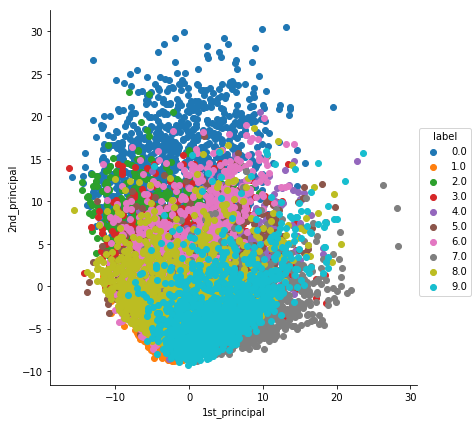

In [11]:
#Plotting the 2D data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [12]:
#initializing the PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [13]:
#configuring the parameters
#the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca reduced will contain the 2d projects of simple data
print("shape of pca_reduced.shape =", pca_data.shape)

shape of pca_reduced.shape = (15000, 2)


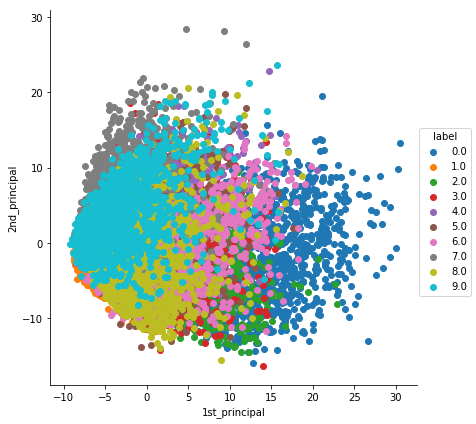

In [14]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for Dimentionality Reduction (not for visualization)

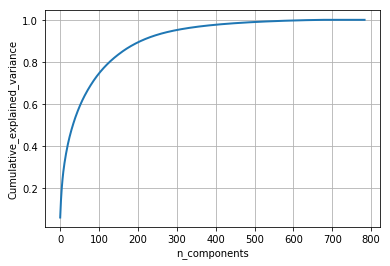

In [15]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# T-SNE using Scikit-Learn

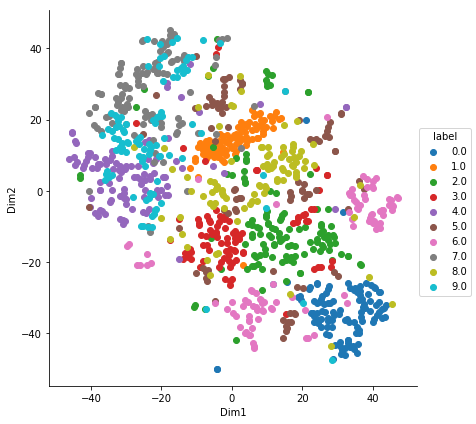

In [16]:
from sklearn.manifold import TSNE

#Picking the top 1000 points as TSNE takes a lot for 15k points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

#Creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim1", "Dim2", "label"))

#Plotting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

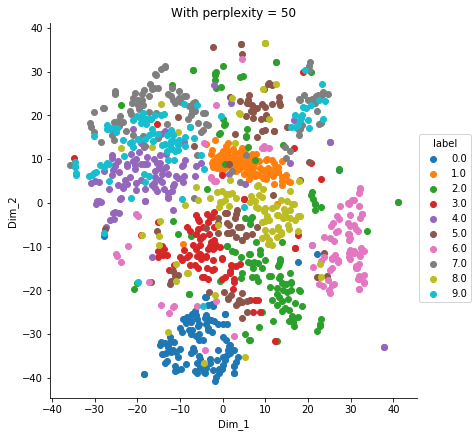

In [17]:
# A variation of t-sne with perplexity=50

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

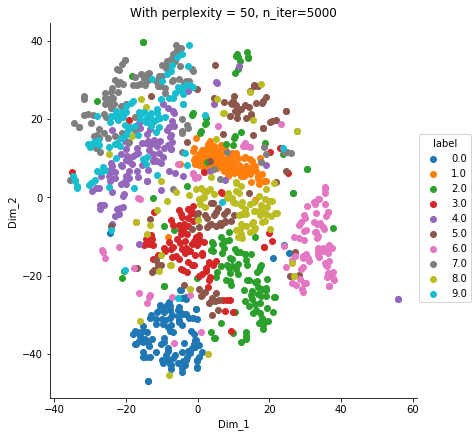

In [18]:
# A variation of t-sne with perplexity=50 and #iteration=5000

model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

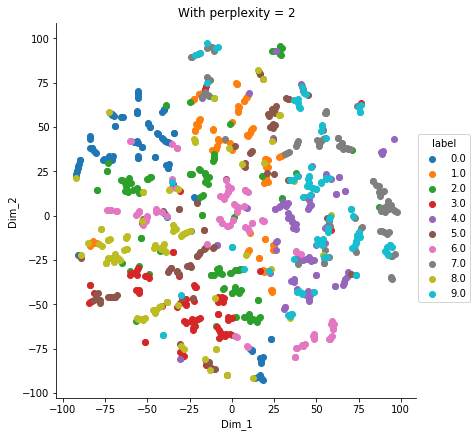

In [19]:
# A variation of t-sne with perplexity=2

model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [ ]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/